# **Data Analytics**
**Programming Assignment 2**
<hr>

**Name:** Abrenica, Francis Rale M. <br>
**Course & Year:** BSCS - 2nd Year

<hr>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
import numpy as np

## **Bar Graph:**


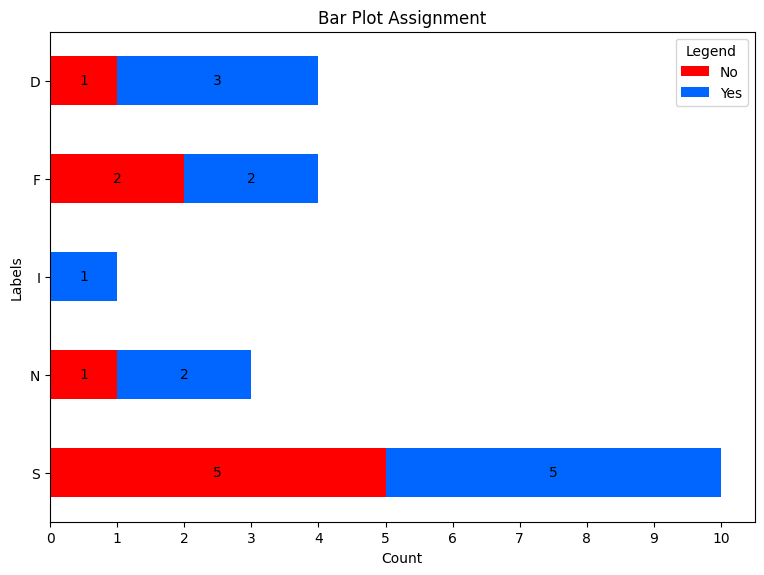

In [ ]:
# Load the bar plot data
bar_df = pd.read_csv("bar_assignment.csv")

# Group by 'LABEL' and 'COUNT', then unstack to create a DataFrame suitable for plotting
bar_counts = bar_df.groupby(['LABEL', 'COUNT']).size().unstack(fill_value=0)
bar_counts = bar_counts.rename(columns={0: 'No', 1: 'Yes'})

# Sort the DataFrame by 'LABEL' to display in alphabetical order
bar_counts = bar_counts.sort_index(ascending=False)

# Reorder the columns to display 'No' first
bar_counts = bar_counts[['No', 'Yes']]

# Create a figure with a specific size
fig = plt.figure(figsize=(20, 14))
gs = GridSpec(2, 2, figure=fig)

# Add a subplot for the bar plot
ax1 = fig.add_subplot(gs[0, 0])
bars = bar_counts.plot(kind='barh', stacked=True, ax=ax1, color=['#ff0000', '#0066ff'])

# Add labels to the bars, excluding zeros
for container in bars.containers:
    labels = [int(v) if v > 0 else '' for v in container.datavalues]
    bars.bar_label(container, labels=labels, label_type='center')

ax1.set_title('Bar Plot Assignment')
ax1.set_xlabel('Count')
ax1.set_ylabel('Labels')
ax1.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax1.legend(title='Legend', labels=['No', 'Yes'])

plt.show()

## **Sankey Diagram:**


In [10]:
# Load the Sankey diagram data
sankey_df = pd.read_csv("sankey_assignment.csv")

# Define source and target nodes
sources = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
targets = ['Reg', 'Aca', 'Oth']
labels = sankey_df['LABEL']

# Combine all nodes into a single list and sort them alphabetically
all_nodes = sorted(sources + labels.tolist() + targets)
node_indices = {node: i for i, node in enumerate(all_nodes)}

# Create links for the Sankey diagram
links = []
for _, row in sankey_df.iterrows():
    label = row['LABEL']
    for source in sources:
        if row[source] > 0:
            links.append({'source': node_indices[source], 'target': node_indices[label], 'value': row[source]})
    for target in targets:
        if row[target] > 0:
            links.append({'source': node_indices[label], 'target': node_indices[target], 'value': row[target]})

# Create the Sankey diagram
sankey_fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, label=all_nodes),
    link=dict(
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links]
    ))])
sankey_fig.update_layout(title_text="Sankey Diagram Title")

# Show the Sankey diagram
sankey_fig.show()

## **Network Graph:**


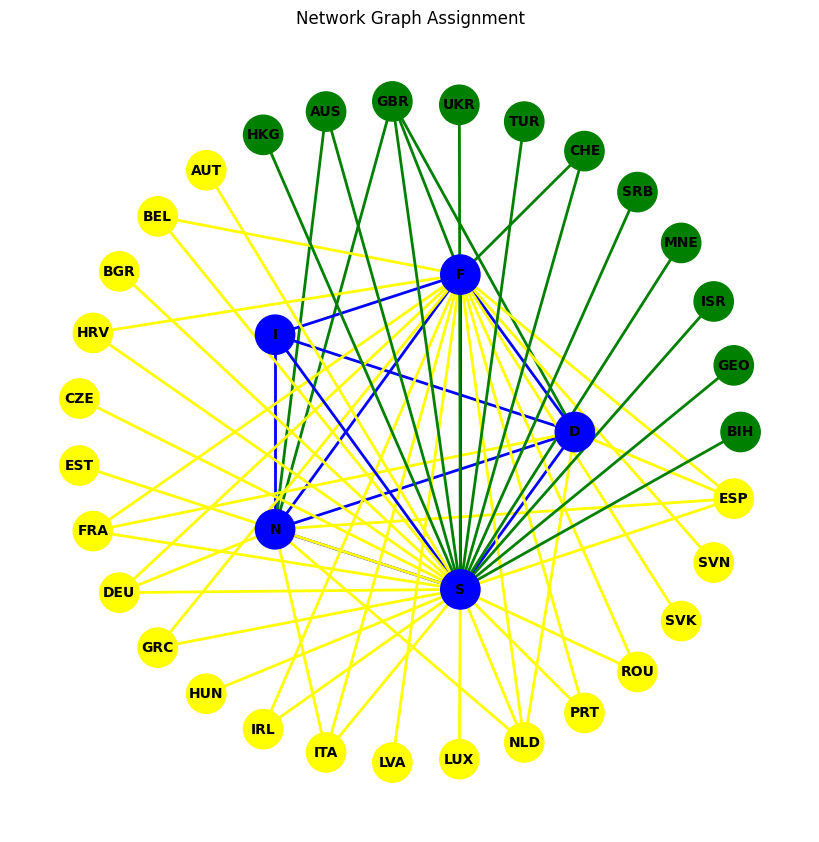

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = 'networks_assignment.csv'
data = pd.read_csv(csv_path)

# Create a new graph
G = nx.Graph()

# Add nodes with labels
nodes = data.columns[1:].tolist()
G.add_nodes_from(nodes)

# Add edges based on the CSV data with weights
for index, row in data.iterrows():
    node = row['LABELS']
    for target, value in row[1:].items():
        if value > 0:
            G.add_edge(node, target, weight=value)

# Define positions for the pentagon nodes
pentagon_nodes = ['D', 'F', 'I', 'N', 'S']
angle = np.linspace(0, 2 * np.pi, len(pentagon_nodes), endpoint=False)
pos = {node: (np.cos(a), np.sin(a)) for node, a in zip(pentagon_nodes, angle)}

# Define positions for the outer nodes (yellow and green)
outer_radius = 2
yellow_nodes = [node for node in nodes if node in [
    'AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']]
green_nodes = [node for node in nodes if node in [
    'BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']]

# Combine yellow and green nodes
outer_nodes = green_nodes + yellow_nodes

# Calculate angles for outer nodes to space them equally
outer_angle = np.linspace(0, 2 * np.pi, len(outer_nodes), endpoint=False)

# Update positions for outer nodes
pos.update({node: (outer_radius * np.cos(a), outer_radius * np.sin(a)) for node, a in zip(outer_nodes, outer_angle)})

# Ensure all nodes have positions
for node in nodes:
    if node not in pos:
        pos[node] = (0, 0)  # Default position if not assigned

# Define node colors
color_map = {
    'D': 'blue', 'F': 'blue', 'I': 'blue', 'N': 'blue', 'S': 'blue',
    'BIH': 'green', 'GEO': 'green', 'ISR': 'green', 'MNE': 'green', 'SRB': 'green', 'CHE': 'green', 'TUR': 'green', 'UKR': 'green', 'GBR': 'green', 'AUS': 'green', 'HKG': 'green', 'USA': 'green',
    'AUT': 'yellow', 'BEL': 'yellow', 'BGR': 'yellow', 'HRV': 'yellow', 'CZE': 'yellow', 'EST': 'yellow', 'FRA': 'yellow', 'DEU': 'yellow', 'GRC': 'yellow', 'HUN': 'yellow', 'IRL': 'yellow', 'ITA': 'yellow', 'LVA': 'yellow', 'LUX': 'yellow', 'NLD': 'yellow', 'PRT': 'yellow', 'ROU': 'yellow', 'SVK': 'yellow', 'SVN': 'yellow', 'ESP': 'yellow',
    'ASU': 'gray'
}
node_colors = [color_map.get(node, 'gray') for node in G.nodes()]

# Filter nodes to display only pentagon, yellow, and green nodes
display_nodes = pentagon_nodes + outer_nodes
display_edges = [(u, v) for u, v, d in G.edges(data=True) if u in display_nodes and v in display_nodes]

# Create a subgraph for display
H = G.edge_subgraph(display_edges).copy()

# Filter positions and colors for the subgraph
subgraph_pos = {node: pos[node] for node in H.nodes()}
subgraph_colors = [color_map[node] for node in H.nodes()]

# Define edge colors based on the nodes they connect
edge_colors = []
for u, v in H.edges():
    if v in yellow_nodes:
        edge_colors.append('yellow')
    elif v in green_nodes:
        edge_colors.append('green')
    else:
        edge_colors.append('blue')

# Draw the graph without edge weights
plt.figure(figsize=(8, 8))
nx.draw(H, subgraph_pos, with_labels=True, node_color=subgraph_colors, node_size=800, font_size=10, font_weight='bold', edge_color=edge_colors, width=2)
plt.title('Network Graph Assignment')
plt.show()